<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/LogoQTurkey.png" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Prepared by Berat Yenilen | Edited by Utku Birkan<br>
        February 15, 2019
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> Deutsch-Jozsa Algorithm </h2> 

Now we can sort of generalize our function $f:\{0,1\}^n \rightarrow \{0,1\}$, which means that our function f takes as input an n-bit string x and maps it to 0 or 1. In this case, we say that f is constant if it maps every string of length n to either 0 or 1, and it is balanced if it maps exactly half of the bit strings to 0 and the other half to 1. 

An example, truth table for a constant and a balanced function can be: ---buraya yapistirabilirsen bir 3 bitlik ornek bence cok guzel olur.

The problem is again the same as before. We are given f as an oracle and we would like to decide whether f is constant or balanced using a quantum computer.

<h3>Notation for Multiple Qubit Registers</h3>

We have already seen expressions like $\ket{01}$ for multiple-qubit quantum states, but what about the states of arbitrary length quantum registers? We use $\ket{0}^{\otimes n}$ for representing $\ket{0} \otimes \ket{0} \otimes \cdots \otimes \ket{0}$ (repeated n times). Similar notation also exists for quantum opreators. For example $ H^{\otimes n}\ket{1}^{\otimes n}$ is $H\ket{1} \otimes H\ket{1} \otimes \cdots \otimes H\ket{1}$ (n times).

Additionally, the notation $\ket{x}$ can be used for $x \in \mathbb{N}$, as the binary representation of the number (the length of the register is  often left implicit). For example $\ket{42}$ can mean $\ket{101010}$ in a 6 qubit register or a $\ket{00101010}$ in an 8 qubit register.

<h3>Applying Hadamard to Multiple Qubit Registers</h3>

We already know about applying Hadamard to $\ket{0}$ and $\ket{1}$. But what happens when we apply the $H^{\otimes n}$ to an n-qubit register? We can intuitively guess that applying the operator to an all 0 register would yield an equal superposition of all possible natural numbers like

$$ H^{\otimes n} \ket{0} = \frac{1}{\sqrt{2^n}} \sum_{z=0}^{2^n-1}\ket{z} $$

What about arbitrary states? Then we have the equation

$$ H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{z=0}^{2^n-1}(-1)^{x \cdot z}\ket{z} $$
where $ x \cdot z $ is the bitwise and operation modulo 2, i.e. $ x \cdot z = \sum_{i=1}^n x_i \cdot z_i \pmod 2 $
(The proof of the above theorem is omitted for brevity)

<h3>Task 1</h3>

Apply $H^{\otimes 4}$to $\ket{15}$. What result do we get?

<h3>Task 2 (Optional)</h3>

How do you think we can prove the above theorem for arbitrary length registers? (You can do this after class)

<h3>Deutsch-Jozsa Algorithm on Multiple Bits</h3>

The algorithm also works on functions $f : \{0, 1\}^n \rightarrow \{0, 1\}$ given we know that the function is **either constant or balanced** (Since it is possible for such a function to be neither). The idea behind it is the same but the math is slightly more tricky and would take longer to explain. So, we are only going to do a brief summary of the idea with no details

<h3>Task 3</h3>

- How many times do we need to use the oracle f, if we want to solve this problem clasically, in the worst case ?

- How many times do you think we will use the oracle f while solving it with a quantum computer?

<h3>Task 4</h3>

What does it mean for a multi-input function to be**constant** or **balanced**? How can we write such a function using a quantum circuit?

Given a number of bits, write two function `balanced(n)` and `constant(n)` to randomly generate quantum circuits that implement a function $ f : \{0, 1\}^n \rightarrow \{0, 1\} $ such that $f$ is either constant or balanced

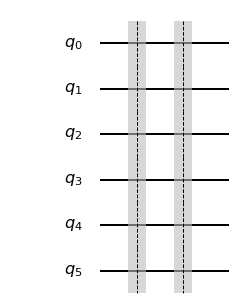

In [2]:
import random
from qiskit import QuantumCircuit, execute, Aer

def balanced(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    # ... generate balanced circuit here
    circuit.barrier()
    return circuit
    
def constant(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    # ... generate constant circuit here
    circuit.barrier()
    return circuit

balanced(5).draw(output='mpl')

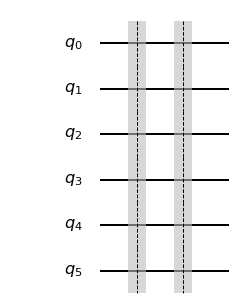

In [3]:
constant(5).draw(output='mpl')

Let's consider a circuit, this time with $n$ input qubits and an output qubit, so our initial state is 
$$ \ket{\psi_0} = \ket{0}^{\otimes n} \otimes \ket{1} $$

After passing through the Hadamard gates; we can say the state of our circuit is

$$ \ket{\psi_1} = \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1} \ket{x} \otimes \ket{-} $$

Similar to the one qubit case, we can say for our oracle $U_f$ that 
$$ U_f(\ket{x}\otimes\ket{-}) = \ket{x} \otimes \frac{\ket{0 \oplus f(x)} - \ket{1 \oplus f(x)}}{\sqrt{2}} $$

With that information, we can rewrite our entire state (after passing through $U_f$) as 
$$ \ket{\psi_2} = \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1} \ket{x} \otimes \frac{\ket{f(x)} - \ket{1 \oplus f(x)}}{\sqrt{2}} $$

If we apply the same phase kickback transformation (as the single qubit algorithm) to this state; we get
$$ \ket{\psi_2} = \bigg[ \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} \ket{x} \bigg] \otimes \ket{-} $$

Now we can ignore the output qubit and only focus on the input qubits to write
$$ \ket{\psi_{2, 0:n-1}} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} \ket{x} $$

Now, if we pass it through hadamard, we get the following result per the theorem above
$$ \ket{\psi_{3, 0:n-1}} = \frac{1}{\sqrt{2^n}} \sum_{z=0}^{2^n-1}\sum_{x=0}^{2^n-1} (-1)^{x\cdot z + f(x)} \ket{z} $$

We know the probability of observing a state is correlated with the square of its amplitude. If we measure the input states we have the following probability (ignoring the normalization term) of observing a given n bit state $z$: 
$$\sum_{x=0}^{2^n-1} (-1)^{2(x\cdot z + f(x))}$$

For observing state $z=0$, we have the probability
$$\sum_{x=0}^{2^n-1} (-1)^{2f(x)}$$

So, if the function is constant, we observe all zeros 100% of the time (similarly, this probability is 0 if the function is constant and we observe a non-zero string)

cozm icin bosluk birak buraya direkt devre kurulcak sekilde.
https://github.com/cnktysz/QuantumWorkspace/blob/master/DeutschJozsa_2qubit.py 
cenk gene yazmis onu saapabilirsin bence.

<h3>Task 5</h3>

You are given an oracle function called `oracle(n)`, which returns a random quantum circuit with `n+1` qubits, which represents the $U_f$ in our algorithm.

Implement the proposed algorithm to decide whether or not your oracle function is constant or even on a circuit of size 4. You should be able the see the circuit structure of $U_f$, if you draw your circuit. Can you check whether your result is correct or not by looking at this circuit ?

Algorithm is as follows: 

- Apply a X gate to the output qubit.
- Apply Hadamard to al qubits.
- Apply $U_f$, that is call the oracle (*add it to your circuit*) 
- Apply Hadamard to input qubits.
- Measure input qubits and comment on the result.

<h5>Qiskit notes:</h5>

- You can use `circuit.measure([q0, q1], [c0, c1])` to only measure some of the qubits
- We can similarly use `circuit.h([q0, q1])` to apply single qubit gates to many qubits in parallel

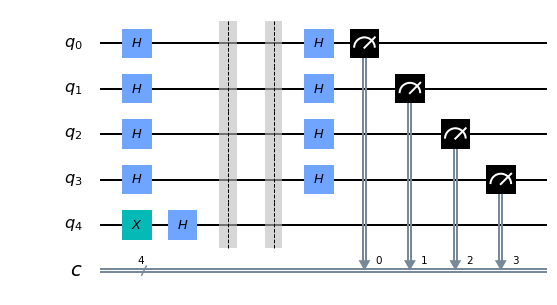

In [4]:
import random
from qiskit import QuantumCircuit, execute, Aer

def oracle(n):
    result = QuantumCircuit(n+1)
    result.barrier()
    
    type = random.choice(["constant", "balanced"])
    if type == "constant":
        # we ignore the input and randomly add a not gate
        if random.randrange(2) == 0:
            result.x(n)
    else:
        # we can add a single cnot to the circuit to have a balanced function
        # but we decide on the control qubit randomly
        control = random.randrange(n)
        result.cx(control, n)
        # randomly invert the result
        if random.randrange(2) == 0:
            result.x(n)
    
    result.barrier()
    return result

dj_circuit = QuantumCircuit(5, 4)

dj_circuit.x(4)

dj_circuit.h(range(5))

dj_circuit += oracle(4)

dj_circuit.h(range(4))
dj_circuit.measure(range(4), range(4))
dj_circuit.draw(output='mpl')

In [5]:
job = execute(dj_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'0000': 10000}


<h5>Some extra (more detailed) explanations:</h5>

- https://qiskit.org/textbook/ch-algorithms/deutsch-josza.html
- https://www.cs.cmu.edu/~odonnell/quantum18/lecture10.pdf
- https://www.scottaaronson.com/qclec/17.pdf
- https://www.youtube.com/watch?v=HAV17aVqufQ
- http://ahmetcevik.com/wp-content/uploads/2020/02/Quantum-computing-lecture-notes.pdf 